<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0706_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.datasets import load_digits

In [4]:
mnist=load_digits()

In [16]:
digit=mnist.data[0]
for r in range(8):
    for c in range(8):
        if digit[r*8+c]!=0:
            print('■',end='')
        else:
            print('  ',end='')
    print()

    ■■■■    
    ■■■■■  
  ■■■  ■■  
  ■■    ■■  
  ■■    ■■  
  ■■  ■■■  
  ■■■■■    
    ■■■      


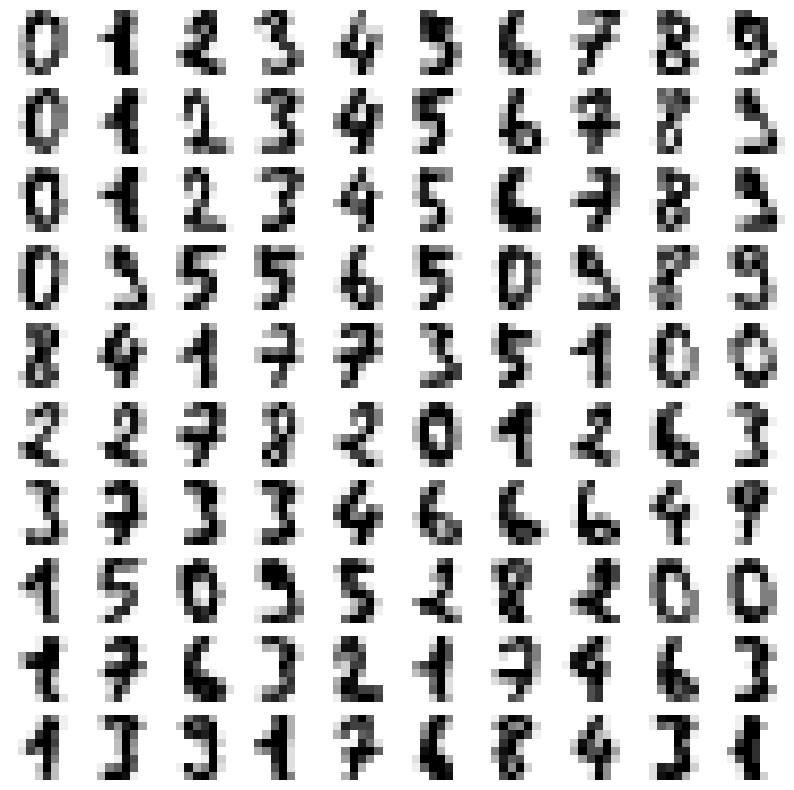

In [21]:
_,axs=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for c in range(10):
        image=mnist.data[i*10+c]
        image=image.reshape(8,8)
        axs[i][c].imshow(image,cmap='gray_r')
        axs[i][c].axis('off')
plt.show()

In [24]:

for r in range(10):
    for c in range(10):
        print(mnist.target[r*10+c],end=' ')
    print()

0 1 2 3 4 5 6 7 8 9 
0 1 2 3 4 5 6 7 8 9 
0 1 2 3 4 5 6 7 8 9 
0 9 5 5 6 5 0 9 8 9 
8 4 1 7 7 3 5 1 0 0 
2 2 7 8 2 0 1 2 6 3 
3 7 3 3 4 6 6 6 4 9 
1 5 0 9 5 2 8 2 0 0 
1 7 6 3 2 1 7 4 6 3 
1 3 9 1 7 6 8 4 3 1 


In [27]:
data=mnist.data
label=mnist.target
data.shape

(1797, 64)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
m1=DecisionTreeClassifier()
m2=RandomForestClassifier()
cv_scores=[]
for model in [m1,m2]:
    cv_score=[]
    for i in range(10):
        scores=cross_val_score(model,data,label,cv=10,scoring='accuracy')
        cv_score.append(scores.mean())
    cv_scores.append(cv_score)
cv_scores

[[0.8391558038485412,
  0.8252451893234015,
  0.831346989447548,
  0.8263780260707636,
  0.8235505896958412,
  0.8235785226567349,
  0.8207883302296711,
  0.8313563004345127,
  0.818544382371198,
  0.829689633767846],
 [0.9460148975791434,
  0.9449006828057106,
  0.9493637492240843,
  0.9510148975791433,
  0.9510273122284294,
  0.9493513345747981,
  0.9510304158907511,
  0.9527001862197393,
  0.9504624456859092,
  0.951024208566108]]

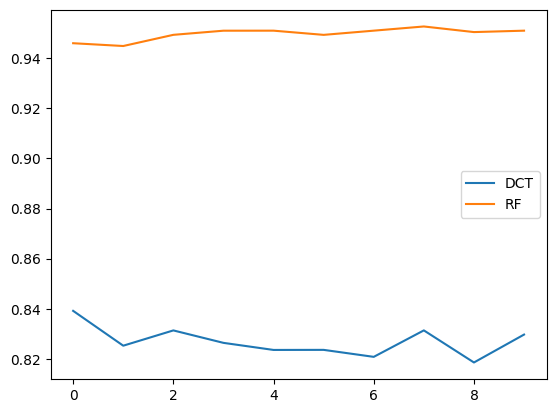

In [31]:
df=pd.DataFrame()
df['DCT']=cv_scores[0]
df['RF']=cv_scores[1]
df.plot()
plt.show()

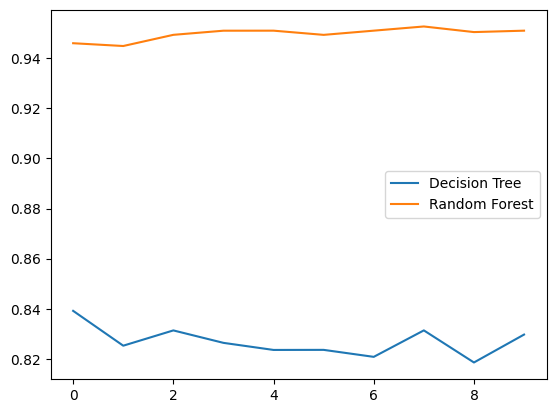

In [32]:
plt.plot(cv_scores[0],label='Decision Tree')
plt.plot(cv_scores[1],label='Random Forest')
plt.legend()
plt.show()

In [33]:
from tensorflow import keras

In [34]:
md=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [36]:
mtrain,mtest=md

In [37]:
x_train,y_train=mtrain
x_test,y_test=mtest

Exception ignored in: <function _xla_gc_callback at 0x7f6804b80e50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


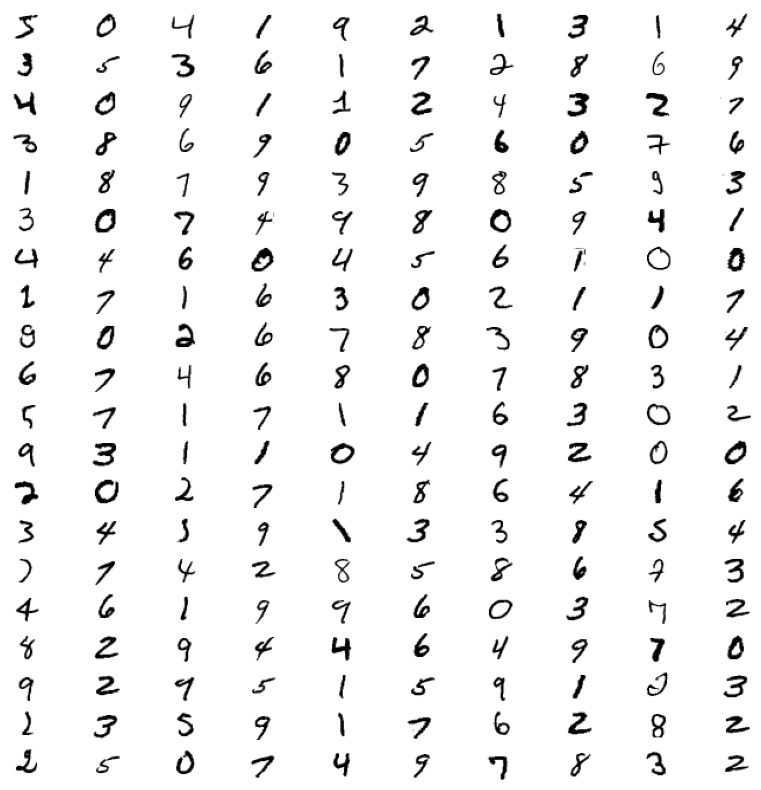

In [41]:
_,axs=plt.subplots(20,10,figsize=(10,10))
for i in range(20):
    for c in range(10):
        image=x_train[i*10+c]
        axs[i][c].imshow(image,cmap='gray_r')
        axs[i][c].axis('off')
plt.show()

In [44]:
y_train.shape

(60000,)

In [45]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28,28)

In [48]:
m1=DecisionTreeClassifier()
m2=RandomForestClassifier()
cv_scores=[]
for model in [m1,m2]:
    cv_score=[]
    for i in range(10):
        scores=cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy')
        cv_score.append(scores.mean())
    cv_scores.append(cv_score)
cv_scores

[[0.8703499999999998,
  0.8696833333333333,
  0.8687666666666667,
  0.87015,
  0.8694833333333334,
  0.8702666666666665,
  0.8696333333333334,
  0.8694166666666667,
  0.8702333333333334,
  0.8691666666666666],
 [0.968,
  0.9682166666666665,
  0.9677333333333333,
  0.9674166666666666,
  0.96775,
  0.9675500000000001,
  0.9675333333333332,
  0.96715,
  0.9669333333333332,
  0.9675666666666667]]

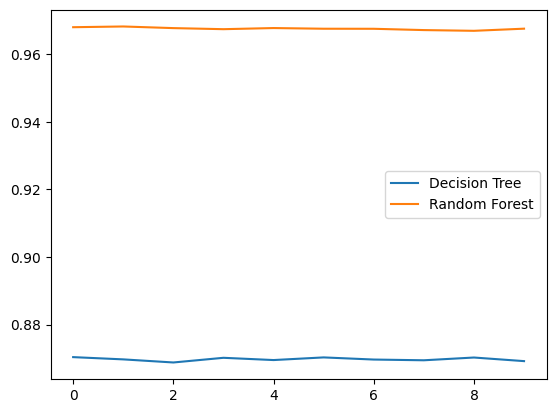

In [51]:
plt.plot(cv_scores[0],label='Decision Tree')
plt.plot(cv_scores[1],label='Random Forest')
plt.legend()
plt.show()

In [53]:
data=mnist.data
label=mnist.target

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [54]:
m1=LogisticRegression()
m2=SVC()
m3=KNeighborsClassifier()
m4=DecisionTreeClassifier()
m5=RandomForestClassifier()

cv_scores=[]
for model in [m1,m2,m3,m4,m5]:
    cv_score=[]
    for i in range(10):
        scores=cross_val_score(model,data,label,cv=10,scoring='accuracy')
        cv_score.append(scores.mean())
    cv_scores.append(cv_score)
cv_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[[0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864],
 [0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554],
 [0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081],
 [0.831927374301676,
  0.8241402855369335,
  0.824130974549969,
  0.8263749224084419,
  0.8213656114214773,
  0.8252482929857232,
  0.8269149596523897,
  0.8224643078833024,
  0.8202234636871507,
  0.8258100558659217],
 [0.9476939788950961,
  0.9487988826815641,
  0.9482371198013656,
  0.9460117939168218,
  0.9510273122284294,
  0.95213221601489

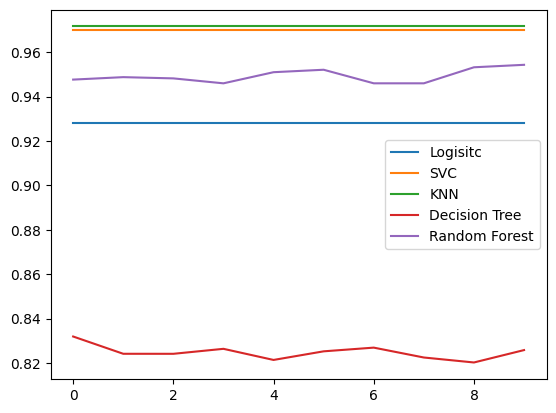

In [55]:
plt.plot(cv_scores[0],label='Logisitc')
plt.plot(cv_scores[1],label='SVC')
plt.plot(cv_scores[2],label='KNN')
plt.plot(cv_scores[3],label='Decision Tree')
plt.plot(cv_scores[4],label='Random Forest')
plt.legend()
plt.show()

In [56]:
m1=LogisticRegression()
m2=SVC()
m3=KNeighborsClassifier()
m4=DecisionTreeClassifier()
m5=RandomForestClassifier()

model=VotingClassifier(estimators=[('lr',m1),('svc',m2),('knn',m3),('DT', m4),('RF',m5)])

cv_scores=[]
for model in [m1,m2,m3,m4,m5]:
    cv_score=[]
    for i in range(10):
        scores=cross_val_score(model,data,label,cv=10,scoring='accuracy')
        cv_score.append(scores.mean())
    cv_scores.append(cv_score)
cv_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[[0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864,
  0.928193668528864],
 [0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554,
  0.9699503414028554],
 [0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081,
  0.9716294227188081],
 [0.8168777157045313,
  0.8285754189944134,
  0.8291495965238982,
  0.8168901303538174,
  0.826927374301676,
  0.8235754189944136,
  0.8346989447548105,
  0.8252389819987584,
  0.8241247672253259,
  0.8308348851644942],
 [0.951582867783985,
  0.9454562383612662,
  0.94768156424581,
  0.9493451272501551,
  0.9471229050279328,
  0.9510148975791433

- linear-regression: https://scikit-learn.org/stable/modules/linear_model.html

In [57]:
from sklearn.datasets import load_iris

In [58]:
iris=load_iris()
data=iris.data
label=iris.target

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model=LinearRegression()
model.fit(data,label)
print(model.coef_, model.intercept_)

[-0.11190585 -0.04007949  0.22864503  0.60925205] 0.186495247206249


In [61]:
sample=[[3,2,5,6]]
pred=model.predict(sample)

In [64]:
s1=sample[0]
pv=model.intercept_
for i,se in enumerate(s1):
    pv+=(s1[i]*model.coef_[i])
pv

4.569356173365145